# Tools - pandas
*The `pandas` library provides high-performance, easy-to-use data structures and data analysis tools. The main data structure is the `DataFrame`, which you can think of as a spreadsheet (including column names and row labels).*

**Prerequisites:**
* NumPy – if you are not familiar with NumPy, we recommend that you go through the [NumPy tutorial](tools_numpy.ipynb) now.

## Setup
First, let's make sure this notebook works well in both python 2 and 3:

In [1]:
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

Now let's import `pandas`. People usually import it as `pd`:

In [2]:
import pandas as pd

## `Series` objects
The `pandas` library contains these useful data structures:
* `Series` objects, that we will discuss now. A `Series` object is similar to a column in a spreadsheet (with a column name and row labels).
* `DataFrame` objects. You can see this as a full spreadsheet (with column names and row labels).
* `Panel` objects. You can see a `Panel` a a dictionary of `DataFrame`s (less used). These are less used, so we will not discuss them here.

### Creating a `Series`
Let's start by creating our first `Series` object!

In [3]:
s = pd.Series([2,-1,3,5])
s

0    2
1   -1
2    3
3    5
dtype: int64

### Similar to a 1D `ndarray`
`Series` objects behave much like one-dimensional NumPy `ndarray`s, and you can often pass them as parameters to NumPy functions:

In [4]:
import numpy as np
np.exp(s)

0      7.389056
1      0.367879
2     20.085537
3    148.413159
dtype: float64

Arithmetic operations on `Series` are also possible, and they apply *elementwise*, just like for `ndarray`s:

In [5]:
s + pd.Series([1000,2000,3000,4000])

0    1002
1    1999
2    3003
3    4005
dtype: int64

Similar to NumPy, if you add a single number to a `Series`, that number is added to all items in the `Series`:

In [6]:
s + 1000

0    1002
1     999
2    1003
3    1005
dtype: int64

The same is true for all binary operations such as `*` or `/`, and even conditional operations:

In [7]:
s < 0

0    False
1     True
2    False
3    False
dtype: bool

### Index labels
Each item in a `Series` object has a unique identifier called the *index label*. By default, it is simply the index of the item in the `Series` but you can also set the index labels manually:

In [8]:
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

You can then use the `Series` just like a `dict`:

In [9]:
s2["bob"]

83

You can still access the items by location, like in a regular array:

In [10]:
s2[1]

83

Slicing a `Series` also slices the index labels:

In [11]:
s2[1:3]

bob         83
charles    112
dtype: int64

This can lead to unexpected results when using the default labels, so be careful:

In [12]:
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise

0    1000
1    1001
2    1002
3    1003
dtype: int64

In [13]:
surprise_slice = surprise[2:]
surprise_slice

2    1002
3    1003
dtype: int64

Oh look! The first element has index label `2`. The element with index label `0` is absent from the slice:

In [14]:
try:
    surprise_slice[0]
except KeyError as e:
    print("Key error:", e)

Key error: 0


But you can access elements by location using the `iloc` attribute:

In [15]:
surprise_slice.iloc[0]

1002

### Init from `dict`
You can create a `Series` object from a `dict`. The keys will be used as index labels:

In [16]:
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

You can control which elements you want to include in the `Series` and in what order by passing a second argument to the constructor with the list of desired index labels:

In [17]:
s4 = pd.Series(weights, ["colin", "alice"])
s4

colin    86
alice    68
dtype: int64

### Automatic alignment
When an operation involves multiple `Series` objects, `pandas` automatically aligns items by matching index labels.

In [18]:
print(s2.keys())
print(s3.keys())
s2 + s3

Index([u'alice', u'bob', u'charles', u'darwin'], dtype='object')
Index([u'alice', u'bob', u'colin', u'darwin'], dtype='object')


alice      136
bob        166
charles    NaN
colin      NaN
darwin     136
dtype: float64

The resulting `Series` contains the union of index labels from `s2` and `s3`. Since `"colin"` is missing from `s2` and `"charles"` is missing from `s3`, these items have a `NaN` result value (ie. Not-a-Number means *missing*).

Automatic alignment is very handy when working with data that may come from various sources with varying structure and missing items. But if you forget to set the right index labels, you can have surprising results:

In [19]:
s5 = pd.Series([1000,1000,1000,1000])
print("s2 =", s2.values)
print("s5 =", s5.values)
print("s2 + s5 =")
s2 + s5

s2 = [ 68  83 112  68]
s5 = [1000 1000 1000 1000]
s2 + s5 =


0         NaN
1         NaN
2         NaN
3         NaN
alice     NaN
bob       NaN
charles   NaN
darwin    NaN
dtype: float64

### Init with a scalar
You can also initialize a `Series` object using a scalar and a list of index labels: all items will be set to the scalar.

In [20]:
meaning = pd.Series(42, ["life", "universe", "everything"])
meaning

life          42
universe      42
everything    42
dtype: int64

### `Series` name
A `Series` can have a `name`:

In [21]:
s6 = pd.Series([83, 68], index=["bob", "alice"], name="weights")
s6

bob      83
alice    68
Name: weights, dtype: int64

### Plotting a `Series`
Pandas makes it easy to plot `Series` data using matplotlib (for more details on matplotlib, check out the [matplotlib tutorial](tools_matplotlib.ipynb)). Just import matplotlib and call the `plot` method:

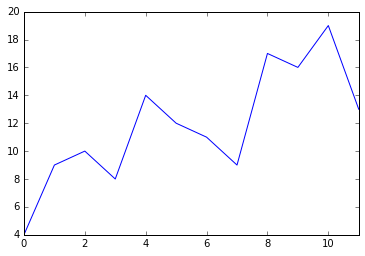

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
s7 = pd.Series([4,9,10,8,14,12,11,9,17,16,19,13], name="temperature")
s7.plot()
plt.show()

There are *many* options for plotting your data. It is not necessary to list them all here: if you need a particular type of plot (histograms, pie charts, etc.), just look for it in the excellent [Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html) section of pandas' documentation, and look at the example code.

## `DataFrame` objects
A DataFrame object represents a spreadsheet, with cell values, column names and row index labels. You can think of them as dictionaries of `Series` objects.

### Creating a `DataFrame`
You can create a DataFrame by passing a dictionary of `Series` objects:

In [23]:
people_ids = ["alice", "bob", "charles"]
people_dict = {
    "weight": pd.Series([68, 83, 112], index=people_ids),
    "birthyear": pd.Series([1985, 1984, 1992], index=people_ids, name="year"),
    "children": pd.Series([np.nan, 3, 0], index=people_ids),
    "hobby": pd.Series(["Biking", "Dancing", "Reading"], index=people_ids),
}
people = pd.DataFrame(people_dict)
people

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3,Dancing,83
charles,1992,0,Reading,112


Note that DataFrames are displayed nicely in Jupyter notebooks! Also, note that `Series` names are ignored (`"year"` was dropped).

You can access columns pretty much as you would expect. They are returned as `Series` objects:

In [24]:
people["birthyear"]

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

If you pass a list of columns and/or index row labels to the `DataFrame` constructor, it will guarantee that these columns and/or rows will exist, in that order, and no other column/row will exist. For example:

In [25]:
d2 = pd.DataFrame(
        people_dict,
        columns=["birthyear", "weight", "height"],
        index=["bob", "alice", "eugene"]
     )
d2

,birthyear,weight,height
bob,1984,83,NaN
alice,1985,68,NaN
eugene,NaN,NaN,NaN


Another convenient way to create a `DataFrame` is to pass all the values to the constructor as an `ndarray`, and specify the column names and row index labels separately:

In [26]:
values = np.array([
            [1985, np.nan, "Biking",   68],
            [1984, 3,      "Dancing",  83],
            [1992, 0,      "Reading", 112]
         ])
d3 = pd.DataFrame(
        values,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

,birthyear,children,hobby,weight
alice,1985,nan,Biking,68
bob,1984,3,Dancing,83
charles,1992,0,Reading,112


Instead of an `ndarray`, you can also pass a `DataFrame` object:

In [27]:
d4 = pd.DataFrame(
         d3,
         columns=["hobby", "children"],
         index=["alice", "bob"]
     )
d4

,hobby,children
alice,Biking,nan
bob,Dancing,3


It is also possible to create a `DataFrame` with a dictionary (or list) of dictionaries (or list):

In [28]:
people = pd.DataFrame({
    "birthyear": {"alice":1985,     "bob": 1984,      "charles": 1992},
    "hobby":     {"alice":"Biking", "bob": "Dancing", "charles": "Reading"},
    "weight":    {"alice":68,       "bob": 83,        "charles": 112},
    "children":  {"alice":np.nan,   "bob": 3,         "charles": 0}
})
people

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3,Dancing,83
charles,1992,0,Reading,112


### Multi-indexing
If all columns are tuples of the same size, then they are understood as a multi-index. The same goes for row index labels. For example:

In [29]:
d5 = pd.DataFrame(
  {
    ("public", "birthyear"):
        {("Paris","alice"):1985, ("Paris","bob"): 1984, ("London","charles"): 1992},
    ("public", "hobby"):
        {("Paris","alice"):"Biking", ("Paris","bob"): "Dancing", ("London","charles"): "Reading"},
    ("private", "weight"):
        {("Paris","alice"):68, ("Paris","bob"): 83, ("London","charles"): 112},
    ("private", "children"):
        {("Paris", "alice"):np.nan, ("Paris","bob"): 3, ("London","charles"): 0}
  }
)
d5

private           public         
               children weight birthyear    hobby
London charles        0    112      1992  Reading
Paris  alice        NaN     68      1985   Biking
       bob            3     83      1984  Dancing

You can now get a `DataFrame` containing all the `"public"` columns very simply:

In [30]:
d5["public"]

birthyear    hobby
London charles       1992  Reading
Paris  alice         1985   Biking
       bob           1984  Dancing

In [31]:
d5["public", "hobby"]  # Same result as d4["public"]["hobby"]

London  charles    Reading
Paris   alice       Biking
        bob        Dancing
Name: (public, hobby), dtype: object

### Accessing rows
Let's go back to the `people` `DataFrame`:

In [32]:
people

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3,Dancing,83
charles,1992,0,Reading,112


The `loc` attribute lets you access rows instead of columns. The result is `Series` object in which the `DataFrame`'s column names are mapped to row index labels:

In [33]:
people.loc["charles"]

birthyear       1992
children           0
hobby        Reading
weight           112
Name: charles, dtype: object

You can also access rows by location using the `iloc` attribute:

In [34]:
people.iloc[2]

birthyear       1992
children           0
hobby        Reading
weight           112
Name: charles, dtype: object

You can also get a slice of rows, and this returns a `DataFrame` object:

In [35]:
people.iloc[1:3]

,birthyear,children,hobby,weight
bob,1984,3,Dancing,83
charles,1992,0,Reading,112


Finally, you can pass a boolean array to get the matching rows:

In [36]:
people[np.array([True, False, True])]

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
charles,1992,0,Reading,112


This is most useful when combined with boolean expressions:

In [37]:
people[people["birthyear"] < 1990]

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3,Dancing,83


### Adding and removing columns
You can generally treat `DataFrame` objects like dictionaries of `Series`, so the following work fine:

In [38]:
people

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3,Dancing,83
charles,1992,0,Reading,112


In [39]:
people["age"] = 2016 - people["birthyear"]  # adds a new column "age"
people["over 30"] = people["age"] > 30      # adds another column "over 30"
birthyears = people.pop("birthyear")
del people["children"]

people

,hobby,weight,age,over 30
alice,Biking,68,31,True
bob,Dancing,83,32,True
charles,Reading,112,24,False


In [40]:
birthyears

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

When you add a new colum, it must have the same number of rows. Missing rows are filled with NaN, and extra rows are ignored:

In [41]:
people["pets"] = pd.Series({"bob": 0, "charles": 5, "eugene":1})  # alice is missing, eugene is ignored
people

,hobby,weight,age,over 30,pets
alice,Biking,68,31,True,NaN
bob,Dancing,83,32,True,0
charles,Reading,112,24,False,5


When adding a new column, it is added at the end (on the right) by default. You can also insert a column anywhere else using the `insert` method:

In [42]:
people.insert(1, "height", [172, 181, 185])
people

,hobby,height,weight,age,over 30,pets
alice,Biking,172,68,31,True,NaN
bob,Dancing,181,83,32,True,0
charles,Reading,185,112,24,False,5


### Assigning new columns
You can also create new columns by calling the `assign` method. Note that this returns a new `DataFrame` object, the original is not modified:

In [43]:
people.assign(
    body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
    has_pets = people["pets"] > 0
)

,hobby,height,weight,age,over 30,pets,body_mass_index,has_pets
alice,Biking,172,68,31,True,NaN,22.985398,False
bob,Dancing,181,83,32,True,0,25.335002,False
charles,Reading,185,112,24,False,5,32.724617,True


Note that you cannot access columns created within the same assignment:

In [44]:
try:
    people.assign(
        body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
        overweight = people["body_mass_index"] > 25
    )
except KeyError as e:
    print("Key error:", e)

Key error: u'body_mass_index'


The solution is to split this assignment in two consecutive assignments:

In [45]:
d6 = people.assign(body_mass_index = people["weight"] / (people["height"] / 100) ** 2)
d6.assign(overweight = d6["body_mass_index"] > 25)

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,31,True,NaN,22.985398,False
bob,Dancing,181,83,32,True,0,25.335002,True
charles,Reading,185,112,24,False,5,32.724617,True


Having to create a temporary variable `d6` is not very convenient. You may want to just chain the assigment calls, but it does not work because the `people` object is not actually modified by the first assignment:

In [46]:
try:
    (people
         .assign(body_mass_index = people["weight"] / (people["height"] / 100) ** 2)
         .assign(overweight = people["body_mass_index"] > 25)
    )
except KeyError as e:
    print("Key error:", e)

Key error: u'body_mass_index'


But fear not, there is a simple solution. You can pass a function to the `assign` method (typically a `lambda` function), and this function will be called with the `DataFrame` as a parameter:

In [47]:
(people
     .assign(body_mass_index = lambda df: df["weight"] / (df["height"] / 100) ** 2)
     .assign(overweight = lambda df: df["body_mass_index"] > 25)
)

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,31,True,NaN,22.985398,False
bob,Dancing,181,83,32,True,0,25.335002,True
charles,Reading,185,112,24,False,5,32.724617,True


Problem solved!

### Evaluating an expression
A great feature supported by pandas is expression evaluation. This relies on the `numexpr` library which must be installed.

In [48]:
people.eval("weight / (height/100) ** 2 > 25")

alice      False
bob         True
charles     True
dtype: bool

Assignment expressions are also supported, and contrary to the `assign` method, this does not create a copy of the `DataFrame`, instead it directly modifies it:

In [49]:
people.eval("body_mass_index = weight / (height/100) ** 2")
people

,hobby,height,weight,age,over 30,pets,body_mass_index
alice,Biking,172,68,31,True,NaN,22.985398
bob,Dancing,181,83,32,True,0,25.335002
charles,Reading,185,112,24,False,5,32.724617


You can use a local or global variable in an expression by prefixing it with `'@'`:

In [50]:
overweight_threshold = 30
people.eval("overweight = body_mass_index > @overweight_threshold")
people

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,31,True,NaN,22.985398,False
bob,Dancing,181,83,32,True,0,25.335002,False
charles,Reading,185,112,24,False,5,32.724617,True


### Querying a `DataFrame`
The `query` method lets you filter a `DataFrame` based on a query expression:

In [51]:
people.query("age > 30 and pets == 0")

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
bob,Dancing,181,83,32,True,0,25.335002,False


### Sorting a `DataFrame`
You can sort a `DataFrame` by calling its `sort_index` method. By default it sorts the rows by their index label, in ascending order, but let's reverse the order:

In [52]:
people.sort_index(ascending=False)

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
charles,Reading,185,112,24,False,5,32.724617,True
bob,Dancing,181,83,32,True,0,25.335002,False
alice,Biking,172,68,31,True,NaN,22.985398,False


Note that `sort_index` returned a sorted *copy* of the `DataFrame`. To modify `people` directly, we can set the `inplace` argument to `True`. Also, we can sort the columns instead of the rows by setting `axis=1`:

In [53]:
people.sort_index(axis=1, inplace=True)
people

,age,body_mass_index,height,hobby,over 30,overweight,pets,weight
alice,31,22.985398,172,Biking,True,False,NaN,68
bob,32,25.335002,181,Dancing,True,False,0,83
charles,24,32.724617,185,Reading,False,True,5,112


To sort the `DataFrame` by the values instead of the labels, we can use `sort_values` and specify the column to sort by:

In [54]:
people.sort_values(by="age", inplace=True)
people

,age,body_mass_index,height,hobby,over 30,overweight,pets,weight
charles,24,32.724617,185,Reading,False,True,5,112
alice,31,22.985398,172,Biking,True,False,NaN,68
bob,32,25.335002,181,Dancing,True,False,0,83


### Plotting a `DataFrame`
Just like for `Series`, pandas makes it easy to draw nice graphs based on a `DataFrame`.

For example, it is trivial to create a line plot from a `DataFrame`'s data by calling its `plot` method:

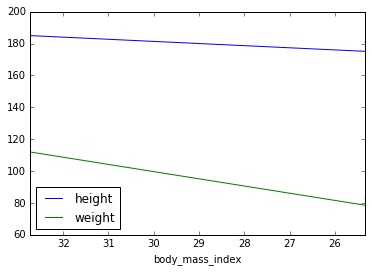

In [55]:
people.plot(kind = "line", x = "body_mass_index", y = ["height", "weight"])
plt.show()

You can pass extra arguments supported by matplotlib's functions. For example, we can create scatterplot and pass it a list of sizes using the `s` argument of matplotlib's `scatter` function:

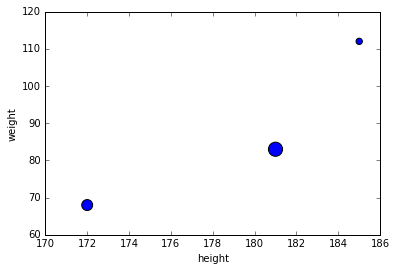

In [56]:
people.plot(kind = "scatter", x = "height", y = "weight", s=[40, 120, 200])
plt.show()

Again, there are way too many options to list here: the best option is to scroll through the [Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html) page in pandas' documentation, find the plot you are interested in and look at the example code.

### Operations on `DataFrame`s
Although `DataFrame`s do not try to mimick NumPy arrays, there are a few similarities. Let's create a `DataFrame` to demonstrate this:

In [57]:
grades_array = np.array([[8,8,9],[10,9,9],[4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, columns=["sep", "oct", "nov"], index=["alice","bob","charles","darwin"])
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


You can apply NumPy mathematical functions on a `DataFrame`: the function is applied to all values:

In [58]:
np.sqrt(grades)

,sep,oct,nov
alice,2.828427,2.828427,3.000000
bob,3.162278,3.000000,3.000000
charles,2.000000,2.828427,1.414214
darwin,3.000000,3.162278,3.162278


Similarly, adding a single value to a `DataFrame` will add that value to all elements in the `DataFrame`. This is called *broadcasting*:

In [59]:
grades + 1

,sep,oct,nov
alice,9,9,10
bob,11,10,10
charles,5,9,3
darwin,10,11,11


Of course, the same is true for all other binary operations, including arithmetic (`*`,`/`,`**`...) and conditional (`>`, `==`...) operations:

In [60]:
grades >= 5

,sep,oct,nov
alice,True,True,True
bob,True,True,True
charles,False,True,False
darwin,True,True,True


Aggregation operations, such as computing the `max`, the `sum` or the `mean` of a `DataFrame`, apply to each column, and you get back a `Series` object:

In [61]:
grades.mean()

sep    7.75
oct    8.75
nov    7.50
dtype: float64

The `all` method is also an aggregation operation: it checks whether all values are `True` or not. Let's see during which months all students got a grade greater than `5`:

In [62]:
(grades > 5).all()

sep    False
oct     True
nov    False
dtype: bool

Most of these functions take an optional `axis` parameter which lets you specify along which axis of the `DataFrame` you want the operation executed. The default is `axis=0`, meaning that the operation is executed vertically (on each column). You can set `axis=1` to execute the operation horizontally (on each row). For example, let's find out which students had all grades greater than `5`:

In [63]:
(grades > 5).all(axis = 1)

alice       True
bob         True
charles    False
darwin      True
dtype: bool

The `any` method returns `True` if any value is True. Let's see who got at least one grade 10:

In [64]:
(grades == 10).any(axis = 1)

alice      False
bob         True
charles    False
darwin      True
dtype: bool

If you add a `Series` object to a `DataFrame` (or execute any other binary operation), pandas attempts to broadcast the operation to all *rows* in the `DataFrame`. This only works if the `Series` has the same size as the `DataFrame`s rows. For example, let's substract the `mean` of the `DataFrame` (a `Series` object) from the `DataFrame`:

In [65]:
grades - grades.mean()  # equivalent to: grades - [7.75, 8.75, 7.50]

,sep,oct,nov
alice,0.25,-0.75,1.5
bob,2.25,0.25,1.5
charles,-3.75,-0.75,-5.5
darwin,1.25,1.25,2.5


We substracted `7.75` from all September grades, `8.75` from October grades and `7.50` from November grades. It is equivalent to substracting this `DataFrame`:

In [66]:
pd.DataFrame([[7.75, 8.75, 7.50]]*4, index=grades.index, columns=grades.columns)

,sep,oct,nov
alice,7.75,8.75,7.5
bob,7.75,8.75,7.5
charles,7.75,8.75,7.5
darwin,7.75,8.75,7.5


If you want to substract the global mean from every grade, here is one way to do it:

In [67]:
grades - grades.values.mean() # substracts the global mean (8.00) from all grades

,sep,oct,nov
alice,0,0,1
bob,2,1,1
charles,-4,0,-6
darwin,1,2,2


### Automatic alignment
Similar to `Series`, when operating on multiple `DataFrame`s, pandas automatically aligns them by row index label, but also by column names. Let's create a `DataFrame` with bonus points for each person from October to December:

In [68]:
bonus_array = np.array([[0,np.nan,2],[np.nan,1,0],[0, 1, 0], [3, 3, 0]])
bonus_points = pd.DataFrame(bonus_array, columns=["oct", "nov", "dec"], index=["bob","colin", "darwin", "charles"])
bonus_points

,oct,nov,dec
bob,0,NaN,2
colin,NaN,1,0
darwin,0,1,0
charles,3,3,0


In [69]:
grades + bonus_points

,dec,nov,oct,sep
alice,NaN,NaN,NaN,NaN
bob,NaN,NaN,9,NaN
charles,NaN,5,11,NaN
colin,NaN,NaN,NaN,NaN
darwin,NaN,11,10,NaN


Looks like the addition worked in some cases but way too many elements are now empty. That's because when aligning the `DataFrame`s, some columns and rows were only present on one side, and thus they were considered missing on the other side (`NaN`). Then adding `NaN` to a number results in `NaN`, hence the result.

### Handling missing data
Dealing with missing data is a frequent task when working with real life data. Pandas offers a few tools to handle missing data.
 
Let's try to fix the problem above. For example, we can decide that missing data should result in a zero, instead of `NaN`. We can replace all `NaN` values by a any value using the `fillna` method:

In [70]:
(grades + bonus_points).fillna(0)

,dec,nov,oct,sep
alice,0,0,0,0
bob,0,0,9,0
charles,0,5,11,0
colin,0,0,0,0
darwin,0,11,10,0


It's a bit unfair that we're setting grades to zero in September, though. Perhaps we should decide that missing grades are missing grades, but missing bonus points should be replaced by zeros:

In [71]:
fixed_bonus_points = bonus_points.fillna(0)
fixed_bonus_points.insert(0, "sep", 0)
fixed_bonus_points.loc["alice"] = 0
grades + fixed_bonus_points

,dec,nov,oct,sep
alice,NaN,9,8,8
bob,NaN,9,9,10
charles,NaN,5,11,4
colin,NaN,NaN,NaN,NaN
darwin,NaN,11,10,9


That's much better: although we made up some data, we have not been too unfair.

Another way to handle missing data is to interpolate. Let's look at the `bonus_points` `DataFrame` again:

In [72]:
bonus_points

,oct,nov,dec
bob,0,NaN,2
colin,NaN,1,0
darwin,0,1,0
charles,3,3,0


Now let's call the `interpolate` method. By default, it interpolates vertically (`axis=0`), so let's tell it to interpolate horizontally (`axis=1`).

In [73]:
bonus_points.interpolate(axis=1)

,oct,nov,dec
bob,0,1,2
colin,NaN,1,0
darwin,0,1,0
charles,3,3,0


Bob had 0 bonus points in October, and 2 in December. When we interpolate for November, we get the mean: 1 bonus point. Colin had 1 bonus point in November, but we do not know how many bonus points he had in September, so we cannot interpolate, this is why there is still a missing value in October after interpolation. To fix this, we can set the September bonus points to 0 before interpolation.

In [74]:
better_bonus_points = bonus_points.copy()
better_bonus_points.insert(0, "sep", 0)
better_bonus_points.loc["alice"] = 0
better_bonus_points = better_bonus_points.interpolate(axis=1)
better_bonus_points

,sep,oct,nov,dec
bob,0,0.0,1,2
colin,0,0.5,1,0
darwin,0,0.0,1,0
charles,0,3.0,3,0
alice,0,0.0,0,0


Great, now we have reasonable bonus points everywhere. Let's find out the final grades:

In [75]:
grades + better_bonus_points

,dec,nov,oct,sep
alice,NaN,9,8,8
bob,NaN,10,9,10
charles,NaN,5,11,4
colin,NaN,NaN,NaN,NaN
darwin,NaN,11,10,9


There's not much we can do about December and Colin: it's bad enough that we are making up bonus points, but we can't reasonably make up grades (well I guess some teachers probably do).

It is slightly annoying that the September column ends up on the right. This is because the `DataFrame`s we are adding do not have the exact same columns (the `grades` `DataFrame` is missing the `"dec"` column), so to make things predictable, pandas orders the final columns alphabetically. To fix this, we can simply add the missing column before adding:

In [76]:
grades["dec"] = np.nan
final_grades = grades + better_bonus_points
final_grades

,sep,oct,nov,dec
alice,8,8,9,NaN
bob,10,9,10,NaN
charles,4,11,5,NaN
colin,NaN,NaN,NaN,NaN
darwin,9,10,11,NaN


### Aggregating with `groupby`
Similar to the SQL language, pandas allows grouping your data into groups to run calculations over each group.

First, let's add some extra data about each person so we can group them:

In [77]:
final_grades["hobby"] = ["Biking", "Dancing", "Reading", "Dancing", "Biking"]
final_grades

,sep,oct,nov,dec,hobby
alice,8,8,9,NaN,Biking
bob,10,9,10,NaN,Dancing
charles,4,11,5,NaN,Reading
colin,NaN,NaN,NaN,NaN,Dancing
darwin,9,10,11,NaN,Biking


Now let's group data in this `DataFrame` by hobby:

In [78]:
grouped_grades = final_grades.groupby("hobby")
grouped_grades

Now let's compute the average grade per hobby:

In [79]:
grouped_grades.mean()

,sep,oct,nov,dec
hobby,,,,
Biking,8.5,9,10,NaN
Dancing,10.0,9,10,NaN
Reading,4.0,11,5,NaN


That was easy! Note that the `NaN` values have simply been skipped.

## Overview functions
When dealing with large `DataFrames`, it is useful to get a quick overview of its content. Pandas offers a few functions for this. First, let's create a large `DataFrame` with a mix of numeric values, missing values and text values. Notice how Jupyter displays only the corners of the `DataFrame`:

In [80]:
much_data = np.fromfunction(lambda x,y: (x+y*y)%17*11, (10000, 26))
large = pd.DataFrame(much_data, columns=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))
large[large%16==0] = np.nan
large.insert(3,"some_text", "Blabla")
large

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11,44,Blabla,99,NaN,88,22,165,143,...,11,NaN,11,44,99,NaN,88,22,165,143
1,11,22,55,Blabla,110,NaN,99,33,NaN,154,...,22,11,22,55,110,NaN,99,33,NaN,154
2,22,33,66,Blabla,121,11,110,44,NaN,165,...,33,22,33,66,121,11,110,44,NaN,165
3,33,44,77,Blabla,132,22,121,55,11,NaN,...,44,33,44,77,132,22,121,55,11,NaN
4,44,55,88,Blabla,143,33,132,66,22,NaN,...,55,44,55,88,143,33,132,66,22,NaN
5,55,66,99,Blabla,154,44,143,77,33,11,...,66,55,66,99,154,44,143,77,33,11
6,66,77,110,Blabla,165,55,154,88,44,22,...,77,66,77,110,165,55,154,88,44,22
7,77,88,121,Blabla,NaN,66,165,99,55,33,...,88,77,88,121,NaN,66,165,99,55,33
8,88,99,132,Blabla,NaN,77,NaN,110,66,44,...,99,88,99,132,NaN,77,NaN,110,66,44
9,99,110,143,Blabla,11,88,NaN,121,77,55,...,110,99,110,143,11,88,NaN,121,77,55


The `head` method returns the top 5 rows:

In [81]:
large.head()

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11,44,Blabla,99,NaN,88,22,165,143,...,11,NaN,11,44,99,NaN,88,22,165,143
1,11,22,55,Blabla,110,NaN,99,33,NaN,154,...,22,11,22,55,110,NaN,99,33,NaN,154
2,22,33,66,Blabla,121,11,110,44,NaN,165,...,33,22,33,66,121,11,110,44,NaN,165
3,33,44,77,Blabla,132,22,121,55,11,NaN,...,44,33,44,77,132,22,121,55,11,NaN
4,44,55,88,Blabla,143,33,132,66,22,NaN,...,55,44,55,88,143,33,132,66,22,NaN


Of course there's also a `tail` function to view the bottom 5 rows. You can pass the number of rows you want:

In [82]:
large.tail(n=2)

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
9998,22,33,66,Blabla,121,11,110,44,NaN,165,...,33,22,33,66,121,11,110,44,NaN,165
9999,33,44,77,Blabla,132,22,121,55,11,NaN,...,44,33,44,77,132,22,121,55,11,NaN


The `info` method prints out a summary of each columns contents:

In [83]:
large.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 27 columns):
A            8823 non-null float64
B            8824 non-null float64
C            8824 non-null float64
some_text    10000 non-null object
D            8824 non-null float64
E            8822 non-null float64
F            8824 non-null float64
G            8824 non-null float64
H            8822 non-null float64
I            8823 non-null float64
J            8823 non-null float64
K            8822 non-null float64
L            8824 non-null float64
M            8824 non-null float64
N            8822 non-null float64
O            8824 non-null float64
P            8824 non-null float64
Q            8824 non-null float64
R            8823 non-null float64
S            8824 non-null float64
T            8824 non-null float64
U            8824 non-null float64
V            8822 non-null float64
W            8824 non-null float64
X            8824 non-null float64
Y            8822

Finally, the `describe` method gives a nice overview of the main aggregated values over each column:
* `count`: number of non-null (not NaN) values
* `mean`: mean of non-null values
* `std`: [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) of non-null values
* `min`: minimum of non-null values
* `25%`, `50%`, `75%`: 25th, 50th and 75th [percentile](https://en.wikipedia.org/wiki/Percentile) of non-null values
* `max`: maximum of non-null values

In [84]:
large.describe()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
count,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000,8823.000000,...,8824.000000,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000
mean,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441,88.022441,...,87.972575,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441
std,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911,47.535911,...,47.535523,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911
min,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
25%,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
50%,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
75%,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
max,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000


# To be continued...
Coming soon:
* categories
* pivot-tables
* stacking
* merging
* time series
* loading & saving